# MATH5271 Environmental Data Science and Statistics



## Week 4: Time Series II - Frequency Domain

### Welcome to Week 4 of MATH5271. In this session we will explore time series analysis using frequency domain methods. By the end of this lab you should understand:

- How to fit individual harmonics to a time series;
- How to represent an entire time series as a sum of harmonic functions and interpret periodograms;
- Use ideas related to the Nyquvist frequency to understand aliased signals and
- Various applications of frequency domain approaches in Environemntal Data Sciences.


## 1. Setup and Load Data

Before we get started analysing some data we need to ensure we have the appropriate 'libraries' installed. You can think of these as opening a box of available tools. The .csv files we upload will be uploaded into a 'pandas' data frame. We will use the 'numpy' (numerical python) packkage to do some basic maths with the data and Matplotlib's 'pyplot' package to make some pretty graphs. There are many other packages and libraries avaialble freely in python. We will experiment with a few in this course but will only really scratch the surface. I will try to keep things as simple as possible so we can focus on understanding - rather than trouble shooting technical issues.

In [1]:
# import libraries
import pandas as pd

# Numerics
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# plot figures in Colaboratory notebook
%matplotlib inline

I have copied the data table 9.6 from Wilks into a csv file and am storing these on github.

We will load the data table as a pandas 'DataFrame'. This is a 2-dimensional data structure that can store data of different types and has inbuilt operations (like calcualting statistics and doing basic plots). 

In [2]:
# Define the URL where the data set is stored
df_url = 'https://raw.githubusercontent.com/janzika/MATH5271/main/Wilks_Table8.6.csv' 

# Import the data set as a Pandas Dataframe using the 'read_csv' function
df = pd.read_csv(df_url)

# Let's look at all the data
pd.set_option('display.max_rows', 100) # Without this it will only show a few rows
display(df)

,Month,Year,Temp_Far,Location
0,1,1987,21.4,Ithaca
1,2,1987,17.9,Ithaca
2,3,1987,35.9,Ithaca
3,4,1987,47.7,Ithaca
4,5,1987,56.4,Ithaca
5,6,1987,66.3,Ithaca
6,7,1987,70.9,Ithaca
7,8,1987,65.8,Ithaca
8,9,1987,60.1,Ithaca
9,10,1987,45.4,Ithaca


## Time domain vs frequency domain (Wilks)

### Time domain
“Time-domain methods seek to characterize data series in the same terms in which they are observed and reported. A primary tool for characterization of relationships between data values in the time-domain approach is the autocorrelation function.“

### Frequency domain
“Frequency-domain analysis represents data series in terms of contributions occurring at different time scales, or characteristic frequencies. Each time scale is represented by a pair of sine and cosine functions.”

## Frequency domain: Practical motivation

- Identify cycles in data (potetially linked to interesting processes)
- May want to remove (filter) certain cycles in order to extract underlying information (e.g. long term trend).
- Frequency domain analysis ‘better’ (we’ll see why) than simply removing averages on certain time scales.

## Frequency domain: Physical Motivations

Oscillations appear in nature as a consequence of physical laws. Consider a simple undamped oscillator :

$$\frac{d^2x}{dt^2}  + c^2x = 0;\,\, x(0)=A; \,\, \frac{dx}{dt}=0$$

where $x$ is displacement and $c$ is a constant. This has the solution 

$$ x(t)=A\cos(cx).$$

Also, many natural systems are subjected to oscillating ‘forcing’ processes.
    


## What examples can you think of where

- Systems in nature generate harmonic cycles internally (i.e. like an oscillator)?
- Systems in nature are affected by harmonic forcing.

In what variables would we see evidence of such cycles?

## Examples of internally  oscillations

- Sound (pressure waves);
- Gravity, Planetary (Rossby, Kelvin etc.);
- Bird song;
- Sweying of trees.

## Fitting harmonics

Let’s say we have some data $y_t$ where $t$ is a time increment, and  we want to fit a single cosine function of known frequency ($2\pi k/n$, where $n$ is length of the timeseires and $k$ is the number of complete cycles) but unknown phase ($\phi_1$) and amplitude $C_1$. Here our model is

$$y_t= \overline{y} + C_1 \cos⁡( \frac{2\pi k}{n} t + \phi_1).$$

Using the identity $\cos(\alpha+\phi) = \cos(\alpha)\cos(\phi_1)+ \sin(\alpha)\sin(\phi_1)$ we find that

$$y_t= \overline{y} + A_1 \cos⁡( \frac{2\pi k}{n} t) + B_1 \sin( \frac{2\pi k}{n} t).$$

with

$$C_1^2 = A_1^2+B_1^2. $$

How might we solve for $A_1$ and $B_1$?



Text(0, 0.5, 'Amplitude')

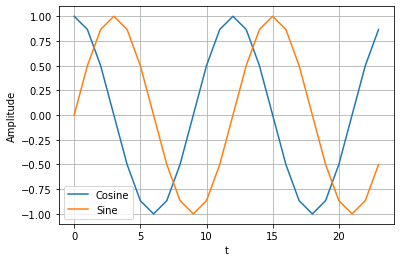

In [18]:
# Plot some cosine and sine functions
n = 24 #length of data set in months
t = np.arange(0,n) #time dimension
k = 2 #number of cycles (period = 12)
# Use numpy to define cosine and sine
cosfnc = np.cos(2*np.pi*t*k/n)
sinfnc = np.sin(2*np.pi*t*k/n)
plt.plot(cosfnc,label ='Cosine')
plt.plot(sinfnc,label ='Sine')
plt.grid(); plt.legend()
plt.xlabel('t');plt.ylabel('Amplitude')

If we want to fit just a single harmonic, then an obvious approach is 'Least Squares' where find $A_k$ and $B_k$ such 

$$ y_i - \overline{y} = A_k \cos\left(\frac{2\pi t k}{n}\right) + B_k \sin\left(\frac{2\pi t k}{n}\right) + \epsilon_t $$

and the root mean square of the error term ($\sum \epsilon_t^2$) is minimised. 

In order to exploit powerful linear algebra methods we can cast the above problem into matrix form such that 

$$ A \bf{x} = \bf{y} - \bf{E} $$

where $A$ is a 2 x $n$ matrix containing the cosine and sine functions, $\bf{x} = [A_k,B_k]$. 

Let's try this and minimise the error using numpy's linear algebra, least squares function.



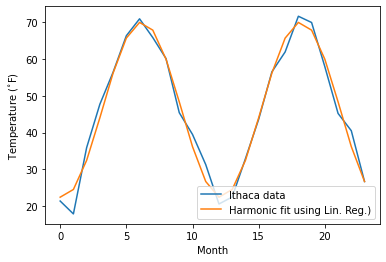

In [22]:
# Define A and y such that Ax = y
A = np.array([cosfnc,sinfnc]).transpose()
y = df.Temp_Far-df.Temp_Far.mean()
# Solve x = inv(A)*y
x_reg = np.linalg.lstsq(A, y,rcond=-1) #(rcond=1 supresses error msg.)
A2lr = x_reg[0][0]; B2lr = x_reg[0][1]; 
y_harmonic = df.Temp_Far.mean() + A2lr*cosfnc+B2lr*sinfnc
# Plot
plt.plot(t,df.Temp_Far,label ='Ithaca data')
plt.plot(t,y_harmonic,label ='Harmonic fit using Lin. Reg.)')
plt.ylabel('Temperature ($^{\circ}$F)'); plt.xlabel('Month'); plt.legend()

### Summation formula

Least squares is actually not necassary in this case. We can compute coefficients for any period ($k$ up to $n/2$) simply using the following summation formulae

$$ A_k = \frac{2}{n}\sum_{t=1}^{n}y_n\cos\left(\frac{2\pi t k}{n}\right)$$

and
$$ B_k = \frac{2}{n}\sum_{t=1}^{n}y_n\sin\left(\frac{2\pi t k}{n}\right).$$

Let's try this.


In [24]:
#Compute coefficients using summation formulae
A2 = (2/n)*np.sum(y*cosfnc)
B2 = (2/n)*np.sum(y*sinfnc)
#print and compare to least squares case (lr)
print(A2,B2)
print(A2lr,B2lr)

-23.739767027193714 -2.163851173473855
-23.739767027193725 -2.1638511734738537


### Why do the summation formulae work?

The trigonometric functions \{$\cos(\frac{2\pi t k}{n}),\sin(\frac{2\pi t k}{n})$\} form a complete orthoginal basis for the possible time series of length $n$. Integrating (summing) the basis functions multiplied by the data $y_t$ determines the projection of the data onto the basis function.

This is called an 'internal product'. Taking the internal product of data with trig functions is equivalent to calculating the 'dot product' of a vector with basis vectors. E.g. for a vector in 3D ${\bf u} = [u,v,w]$ and basis vectors $\{{\bf i},{\bf j},{\bf k}\}$ we have
$$ {\bf u} \cdot {\bf i} = [u,0,0];\\
{\bf u} \cdot {\bf j} = [0,v,0]; \\
{\bf u} \cdot {\bf k} = [0,0,w].$$ 

We can think of the coefficients as describing how much the data projects onto each harmonic.

# Fourier Transform

In general, we can represent any data with the set of harmonics from $k=1$ to $k=n/2$ such that

$$ y_t = \overline{y} + \sum^{n/2}_{k=1} \left[ A_k\cos(\frac{2\pi t k}{n}) +B_k\sin(\frac{2\pi t k}{n})\right].
$$

The maginute of the data at each frequency $\omega_k = 2\pi k/n$ and period $\tau_k = n/k$ is given by 

$$ C_k = \left[ A_k^2+ B_k^2 \right]^{1/2}. $$

This projection of the data into the frequqncy domain is called the 'Fourier Transform'.

Let's write a function to calculate the coefficients for all periods.

In [36]:
# Define function with data and harmonic as inputs, A and B as outputs
def fourtrans(y,k): # y = data, k = harmonic
  n = y.shape[0]
  A_k=(2/n)*np.sum(y.values*np.cos(2*np.pi*k*np.arange(0,n)/n))
  B_k=(2/n)*np.sum(y.values*np.sin(2*np.pi*k*np.arange(0,n)/n))
  return (A_k, B_k)
# Test for kth harmonic
k=2
[A,B] = fourtrans(y,k)
print([A,B])
C = np.sqrt(A**2+B**2)
print(C)

[-23.739767027193714, -2.163851173473855]
23.838179259464805


##  Fast Fourier Transform
We can diagnose the same thing using a Fast Fourier Transform algorithm. These are ubiquitous across and there is an inbuilt package in numpy.

The fast fourier transform actually computes complex coefficients ($H_k$) where

$$ H_k = \frac{n}{2}\sum_{i=1}^{n}y_n\exp^{-i\left(\frac{2\pi i k}{n}\right)} = \frac{n}{2}(A_k+iB_k)$$

and $i$ is the complex number with $\sqrt{i} = -1$. 

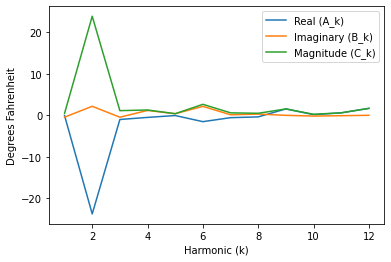

In [130]:
## Use FFT to compute H_k and plot resulting 
Hk = np.fft.rfft(y,n)
# Plot each componenent and magnitude
plt.plot(np.arange(1,Hk.shape[0]),Hk.real[1:(int(n/2)+1)]/(n/2),label='Real (A_k)')
plt.plot(np.arange(1,Hk.shape[0]),Hk.imag[1:(int(n/2)+1)]/(n/2),label='Imaginary (B_k)')
plt.plot(np.arange(1,Hk.shape[0]),abs(Hk[1:int(n/2)+1]/(n/2)),label='Magnitude (C_k)')
plt.xlabel('Harmonic (k)');plt.ylabel('Degrees Fahrenheit');plt.legend()

##  Periodogram

It is instructive to determine the fraction of the total variability that resides at each frequency. For this it is useful to 'normalise' the magnitude of the harmonics $C_k$. 

The proportion of the total variance is given by the common $R^2$ statistic for the fit of each harmonic such that

$$ R_k^2  = \frac{(n/2) C_k^2}{(n-1)s_y}$$

Let's display the the frequency domain projection of the Ithaca data as a periodogram.

Text(0.5, 0, 'Period, $\tau_k$ (months)')

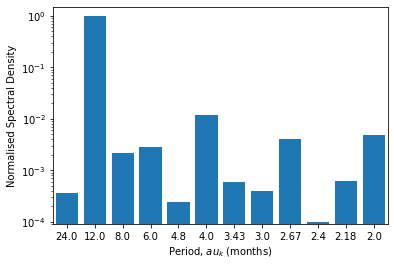

In [131]:
# Calculate variance
sy2 = y.var()
# Magnitude of kth harmonic
C_k = abs(Hk[1:(int(n/2)+1)])/(n/2)
# Plot 'bar graph'
plt.bar(np.arange(1,int(n/2)+1),(n*C_k**2/(2*(n-1)*sy)))
plt.yscale('log')
plt.xticks(np.arange(1,(int(n/2)+1)),np.round(n/np.arange(1,(int(n/2)+1)),2))
plt.axis([0.5,12.5,0.00009,1.5])
plt.ylabel('Normalised Spectral Density')
plt.xlabel('Period, $\tau_k$ (months)')


# 

## 4. Exercise

----

Get into groups of 3-4 and complete the following:

1.   Explore ways of removing the sesonal cycle from the Ithaca temperature data using the methods above. What is the general way to construct a time series with/without certain modes of variability.

2.   Add in higher frequency modes of variability to the Ithaca times series. Show how these can be picked up by the FFT and also illustrate how they may not. Discuss in relation to the Nyquvist frequency.

3. Why is Wilks different?

### Answers:

1.We can express $y_i$ using

$$ y_i = \sum_{k=1}^{n/2} A_k \cos\left(\frac{2\pi i k}{n}\right) + B_k \sin\left(\frac{2\pi i k}{n}\right) + \overline{y}. $$

If we want to filter out the $l$th harmonic (or mupltiple harmonics) we can reconstruct the filtered data using

$$ y^{filtered}_i = \sum_{k\neq l}^{n/2} A_k \cos\left(\frac{2\pi i k}{n}\right) + B_k \sin\left(\frac{2\pi i k}{n}\right)+ \overline{y}$$.

Essentially the process here is to take a Fourier Transform which moves the data into the frequency domain, remove certain aspects of the frequency domain data, then restore the remaining signal to the time domain.

2 and 3: 

To be continued...





----

# 6. Extra

If everyone in your group is finished and getting bored here are a few things you can get started on:

 - Go to the Australian Buerau of Meterorlogy's website and download data for your first assessment task and begin to explore with your group.